In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [193]:
def parse_output(output):
    df = pd.DataFrame()
    for line in output:
        line = line.replace('\n', '')
        parsed_line = list(filter(lambda x: x.strip()!='', line.split(' ')))
        df = df.append({"time": parsed_line[0], 'port': parsed_line[1], 'value': (parsed_line[2])}, ignore_index=True)
    return df

def process_file(f, filename):
    lines = f.readlines()

    df = parse_output(lines)
    df['file'] = file
    
    # agrupo por time, file
    df = df.groupby(['time', 'file']).apply(lambda x: dict(x.values)).reset_index()

    # mapeo los valores en forma de dict a columnas
    df = df.drop([0], axis=1).join(df[0].apply(pd.Series))

    return df

Primero parseamos los datos que obtenemos del output para que sea más cómodo

In [194]:
import os

df = pd.DataFrame()
for file in os.listdir():
    if (not file.startswith('sim')):
        continue
    
    with open(file + '/output', 'r') as f:
        current_df = process_file(f, file)
        df = df.append(current_df)
df

,time,file,sun_radiation,sun_degree,obtained_energy,consumed_energy,battery
0,00:06:00:000:0,sim-tol-1,9.14000,-35.01000,0.00000,0.00000,0.00000
1,00:12:00:000:0,sim-tol-1,9.14000,-35.19000,0.00000,0.00000,0.00000
2,00:18:00:000:0,sim-tol-1,9.14000,-35.34000,0.00000,0.00000,0.00000
3,00:24:00:000:0,sim-tol-1,9.14000,-35.46000,0.00000,0.00000,0.00000
4,00:30:00:000:0,sim-tol-1,9.14000,-35.53000,0.00000,0.00000,0.00000
5,00:36:00:000:0,sim-tol-1,9.14000,-35.57000,0.00000,0.00000,0.00000
6,00:42:00:000:0,sim-tol-1,9.14000,-35.58000,0.00000,0.00000,0.00000
7,00:48:00:000:0,sim-tol-1,9.14000,-35.54000,0.00000,0.00000,0.00000
8,00:54:00:000:0,sim-tol-1,9.14000,-35.47000,0.00000,0.00000,0.00000
9,01:00:00:000:0,sim-tol-1,9.14000,-35.36000,0.00000,0.00000,0.00000


Primero analizamos el comportamiento del sol

In [205]:
df['sun_degree'] = df['sun_degree'].apply(lambda x: float(x))
df['sun_radiation'] = df['sun_radiation'].apply(lambda x: float(x))

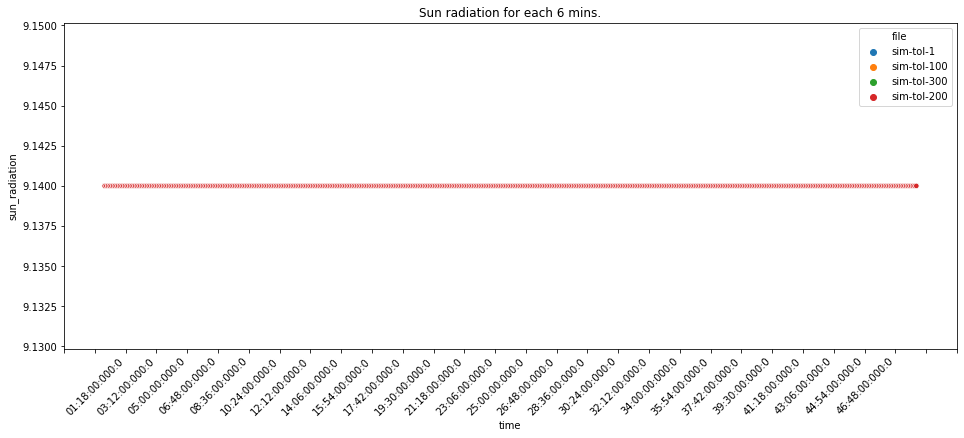

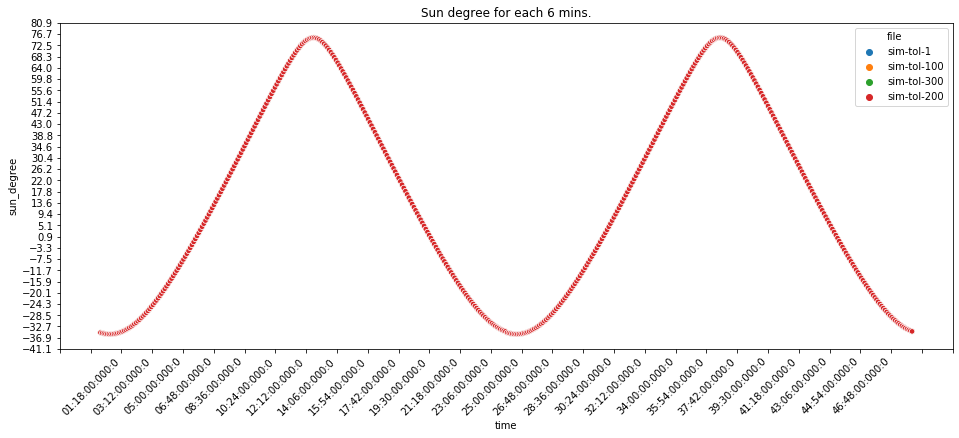

In [206]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x='time', y='sun_radiation',data=df, hue='file', s=30)
ax.xaxis.set_major_locator(ticker.LinearLocator(30))
plt.xticks(rotation=45, ha='right')
plt.title("Sun radiation for each 6 mins.")
plt.show()

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x='time', y='sun_degree',data=df, hue='file', s=30)
ax.xaxis.set_major_locator(ticker.LinearLocator(30))
ax.yaxis.set_major_locator(ticker.LinearLocator(30))
plt.xticks(rotation=45, ha='right')
plt.title("Sun degree for each 6 mins.")
plt.show()

Ahora analizamos la energía neta obtenida. Para ello, agregamos una columna con las energía neta obtenida en cada instante

In [195]:
obtained_energies = df['obtained_energy'].apply(lambda x: float(x))
consumed_energies = df['consumed_energy'].apply(lambda x: float(x))
df['net_obtained_energy'] = obtained_energies - consumed_energies

<Figure size 432x288 with 0 Axes>

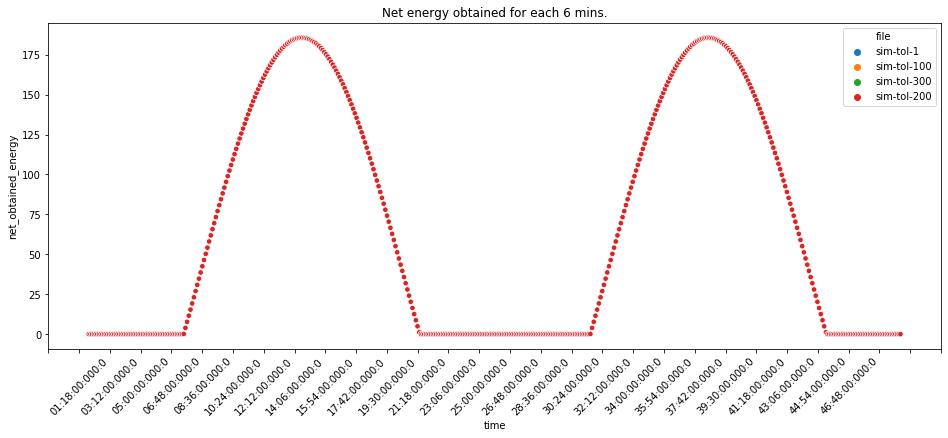

In [207]:
fig = plt.figure()
plt.figure(figsize=(16, 6))

ax = sns.scatterplot(x='time', y='net_obtained_energy',data=df, hue='file', s=30)
ax.xaxis.set_major_locator(ticker.LinearLocator(30))
plt.xticks(rotation=45, ha='right')
plt.title("Net energy obtained for each 6 mins.")
plt.show()

Ahora analizamos los resultados al final de la simulación.
Tomamos el último valor de la batería en cada una, que nos dice cuanta energía neta se acumuló en total.

In [208]:
batteries = df.groupby('file')['battery'].last().reset_index()
batteries['battery'] = batteries['battery'].apply(lambda x: float(x))
batteries

,file,battery
0,sim-tol-1,32299.72661
1,sim-tol-100,32329.69661
2,sim-tol-200,32329.69661
3,sim-tol-300,32329.69661


Text(0.5, 1, 'Total net energy obtained')

<Figure size 360x360 with 0 Axes>

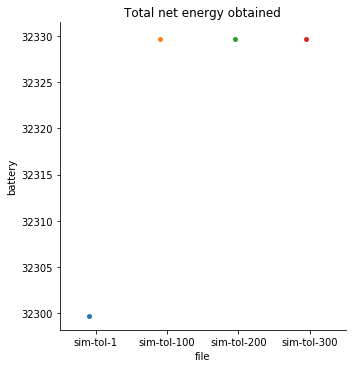

In [211]:
plt.figure(figsize=(5, 5))

ax = sns.catplot(x='file', y='battery',data=batteries) # no se por que aca muestra mejor la diferencia, pero barplot deberia quedar mejor
plt.title("Total net energy obtained")
